In [1]:
# -----------------------------------------------------------------------------
# :author:    Juanjuan Huang & Shelly D. Keylly
# :email:     juanjuan.huang@anl.gov
# :copyright: Copyright © 2023, UChicago Argonne, LLC
# -----------------------------------------------------------------------------


## Imports

In [1]:
# %matplotlib widget
import neighbor_core as nc
from neighbor_core import ClusterNeighbor
from ipyfilechooser import FileChooser
import numpy as np

# Example 1, basic functionality go through

## Initialize a cluster and view it

In [12]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

## view it

In [51]:
cluster = ClusterNeighbor()
if fc.value is not None:
    cluster.load_xyz(path=fc.value)
else:
    cluster.load_xyz(path="structure_examples/198087-ICSD molecule.xyz")
cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Plot histogram

In [52]:
cluster.get_pairs()
cluster.plot_hist(plot_engine="plotly")

## Get CN reports and save to excel

In [53]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False)
cluster.print_CN_summary()
cluster.write_to_excel("20240806_test_original.xlsx")

Bond Type: O-Pb
-- Distance: 2.164006661818935
-- Average CN: 1.7727272727272727
-- Info: 
20 atoms have CN of 1; 
14 atoms have CN of 2; 
10 atoms have CN of 3; 
-- Tolerance: 0.1 

-- Distance: 3.759464103600722
-- Average CN: 0.8181818181818182
-- Info: 
16 atoms have CN of 0; 
20 atoms have CN of 1; 
8 atoms have CN of 2; 
-- Tolerance: 0.1 

-- Distance: 4.0161487745681885
-- Average CN: 0.8181818181818182
-- Info: 
10 atoms have CN of 0; 
32 atoms have CN of 1; 
2 atoms have CN of 2; 
-- Tolerance: 0.1 

-- Distance: 4.450974934970656
-- Average CN: 1.4545454545454546
-- Info: 
10 atoms have CN of 0; 
8 atoms have CN of 1; 
24 atoms have CN of 2; 
2 atoms have CN of 4; 
-- Tolerance: 0.1 

-- Distance: 4.861048023898767
-- Average CN: 0.3181818181818182
-- Info: 
30 atoms have CN of 0; 
14 atoms have CN of 1; 
-- Tolerance: 0.1 

Bond Type: Pb-Pb
-- Distance: 3.389999918388575
-- Average CN: 0.8
-- Info: 
4 atoms have CN of 0; 
10 atoms have CN of 1; 
1 atoms have CN of 2; 
-- To

## remove undercoordinated atoms

In [62]:
cluster.remove_under_coordinated_atoms(center_atom="Pb", CN_atom="O", CN_threshold=4, bond_range=3, self_apply=True)
cluster.view_xyz(label=True, show_symbol=True)

Remove under-coordinated atoms: Atoms(symbols='Pb4', pbc=False)[[22, 37, 57, 58]]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [8]:
cluster.get_CN_summary_all(tolerance=0.1, bond_range=5, printit=False)
cluster.print_CN_summary()
cluster.write_to_excel("20240807_test_reduced.xlsx")

Bond Type: Pb-O
-- Distance: 2.164006684677769
-- Average CN: 6.0
-- Info: 
11 atoms have CN of 6; 
-- Tolerance: 0.1 

-- Distance: 3.7594640623910167
-- Average CN: 2.5454545454545454
-- Info: 
8 atoms have CN of 2; 
3 atoms have CN of 4; 
-- Tolerance: 0.1 

-- Distance: 4.016148722271057
-- Average CN: 2.5454545454545454
-- Info: 
6 atoms have CN of 2; 
4 atoms have CN of 3; 
1 atoms have CN of 4; 
-- Tolerance: 0.1 

-- Distance: 4.450974886404176
-- Average CN: 4.363636363636363
-- Info: 
10 atoms have CN of 4; 
1 atoms have CN of 8; 
-- Tolerance: 0.1 

-- Distance: 4.861047941704461
-- Average CN: 0.9090909090909091
-- Info: 
4 atoms have CN of 0; 
4 atoms have CN of 1; 
3 atoms have CN of 2; 
-- Tolerance: 0.1 

Bond Type: O-O
-- Distance: 2.707596806026806
-- Average CN: 0.7272727272727273
-- Info: 
12 atoms have CN of 0; 
32 atoms have CN of 1; 
-- Tolerance: 0.1 

-- Distance: 3.056656193800888
-- Average CN: 5.090909090909091
-- Info: 
4 atoms have CN of 2; 
18 atoms have 

# Example 2: Polynomial fits of different shells

## select a cif file

In [2]:
%matplotlib widget
import neighbor_core as nc
from neighbor_core import ClusterNeighbor
from ipyfilechooser import FileChooser
import numpy as np

In [3]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

In [4]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="test_Pt/Ptfoil_243678.cif")
cif_cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [70]:
cif_cluster.get_CN_all(tolerance=0.1, bond_range=10, printit=True)

Cu-Cu
1 length: 2.530  CN: 2520.000


## For multiple shells with undercoordinated atoms removed

In [72]:
center_atom = "Cu"
CN_atom = "Cu"
CN_bond_range = 6
tolerance = 0.1
undercoordinated_threshold = 6

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

sizes = np.hstack([np.arange(5, 20, 2), np.arange(20, 60, 10)])
# sizes = np.hstack([np.arange(5, 20, 5), np.arange(20, 40, 10)])

for i in sizes:
    expanded_cluster = cif_cluster.expand_to_sphere(target_diameter=i, self_apply=False)
    new_cluster = ClusterNeighbor()
    new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    num_atoms = len(new_cluster.atoms)
    new_cluster.atoms.set_pbc(False)

    if 4 < num_atoms < 200:

        new_cluster.remove_under_coordinated_atoms(center_atom=center_atom, 
                                                   CN_atom=CN_atom, 
                                                   CN_threshold=undercoordinated_threshold, 
                                                   bond_range=3, 
                                                   self_apply=True)

    new_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    new_cluster.write_to_excel(f"size_{new_cluster.get_cluster_size():.2f}A")
    # new_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(new_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)

    # new_cluster.view_xyz(label=False)
    print(f"Processed size: {new_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    print(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'])


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 2.529625485981734 A with 1 shells
defaultdict(<class 'dict'>, {2.5296254859817338: {'average_CN': 3.0, 'info': '4 atoms have CN of 3; ', 'tolerance': 0.1}})
Remove under-coordinated atoms: Atoms(symbols='Cu16', pbc=False, cell=[10.73229201, 10.73229201, 10.73229201], spacegroup_kinds=...)[[2, 3, 7, 10, 11, 16, 17, 23, 25, 26, 30, 33, 35, 38, 41, 43]]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 7.588876457945203 A with 5 shells
defaultdict(<class 'dict'>, {2.5296254859817338: {'average_CN': 6.857142857142857, 'info': '12 atoms have CN of 5; \n12 atoms have CN of 7; \n4 atoms have CN of 12; ', 'tolerance': 0.1}, 3.577430669999999: {'average_CN': 2.5714285714285716, 'info': '12 atoms have CN of 2; \n16 atoms have CN of 3; ', 'tolerance': 0.1}, 4.381439865841477: {'average_CN': 6.857142857142857, 'info': '12 atoms have CN of 5; \n12 atoms have CN of 8; \n4 atoms have CN of 9; ', 'tolerance': 0.1}, 5.059250971963468: {'average_CN': 2.5714285714285716, 'info': '12 atoms have CN of 2; \n16 atoms have CN of 3; ', 'tolerance': 0.1}, 5.6564145442711: {'average_CN': 3.4285714285714284, 'info': '4 atoms have CN of 0; \n24 atoms have CN of 4; ', 'tolerance': 0.1}})
Remove under-coordinated atoms: Atoms(symbols='Cu12', pbc=False, cell=[17.88715335, 17.88715335, 17.88715335], spacegroup_kinds=...)[[6, 8, 45, 47, 48, 78, 96, 101, 104, 112, 143, 151]]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 13.622450142339352 A with 5 shells
defaultdict(<class 'dict'>, {2.529625485981734: {'average_CN': 8.914285714285715, 'info': '12 atoms have CN of 5; \n24 atoms have CN of 6; \n24 atoms have CN of 7; \n12 atoms have CN of 9; \n24 atoms have CN of 10; \n44 atoms have CN of 12; ', 'tolerance': 0.1}, 3.577430669999999: {'average_CN': 3.7714285714285714, 'info': '24 atoms have CN of 2; \n52 atoms have CN of 3; \n24 atoms have CN of 4; \n12 atoms have CN of 5; \n28 atoms have CN of 6; ', 'tolerance': 0.1}, 4.381439865841477: {'average_CN': 13.542857142857143, 'info': '36 atoms have CN of 9; \n12 atoms have CN of 10; \n24 atoms have CN of 12; \n36 atoms have CN of 14; \n4 atoms have CN of 15; \n12 atoms have CN of 19; \n12 atoms have CN of 23; \n4 atoms have CN of 24; ', 'tolerance': 0.1}, 5.0592509719634675: {'average_CN': 6.0, 'info': '12 atoms have CN of 3; \n12 atoms have CN of 4; \n48 atoms have CN of 5; \n24 atoms have CN of 6; \n24 atoms have CN of 7; \n4 atoms have CN 

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 19.75700663205405 A with 5 shells
defaultdict(<class 'dict'>, {2.5296254859817338: {'average_CN': 9.666666666666666, 'info': '24 atoms have CN of 5; \n48 atoms have CN of 6; \n36 atoms have CN of 7; \n36 atoms have CN of 9; \n36 atoms have CN of 10; \n24 atoms have CN of 11; \n156 atoms have CN of 12; ', 'tolerance': 0.1}, 3.5774306699999987: {'average_CN': 4.4, 'info': '12 atoms have CN of 1; \n100 atoms have CN of 3; \n84 atoms have CN of 4; \n48 atoms have CN of 5; \n116 atoms have CN of 6; ', 'tolerance': 0.1}, 4.381439865841476: {'average_CN': 16.266666666666666, 'info': '12 atoms have CN of 9; \n24 atoms have CN of 10; \n24 atoms have CN of 11; \n60 atoms have CN of 12; \n24 atoms have CN of 13; \n36 atoms have CN of 14; \n4 atoms have CN of 15; \n24 atoms have CN of 16; \n12 atoms have CN of 17; \n24 atoms have CN of 18; \n12 atoms have CN of 19; \n12 atoms have CN of 20; \n12 atoms have CN of 21; \n12 atoms have CN of 23; \n68 atoms have CN of 24; ', 'tolerance'

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 29.608507199924492 A with 5 shells
defaultdict(<class 'dict'>, {2.529625485981734: {'average_CN': 10.504918032786886, 'info': '12 atoms have CN of 5; \n72 atoms have CN of 6; \n120 atoms have CN of 7; \n72 atoms have CN of 8; \n76 atoms have CN of 9; \n60 atoms have CN of 10; \n72 atoms have CN of 11; \n736 atoms have CN of 12; ', 'tolerance': 0.1}, 3.577430669999999: {'average_CN': 4.937704918032787, 'info': '24 atoms have CN of 2; \n232 atoms have CN of 3; \n156 atoms have CN of 4; \n192 atoms have CN of 5; \n616 atoms have CN of 6; ', 'tolerance': 0.1}, 4.381439865841476: {'average_CN': 18.7672131147541, 'info': '36 atoms have CN of 10; \n24 atoms have CN of 11; \n204 atoms have CN of 12; \n48 atoms have CN of 13; \n12 atoms have CN of 14; \n52 atoms have CN of 15; \n84 atoms have CN of 16; \n48 atoms have CN of 17; \n36 atoms have CN of 18; \n84 atoms have CN of 19; \n48 atoms have CN of 20; \n40 atoms have CN of 21; \n48 atoms have CN of 23; \n456 atoms have CN of 

In [9]:
center_atom = "Pt"
CN_atom = "Pt"
CN_bond_range = 6
tolerance = 0.1
undercoordinated_threshold = 4

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

sizes = np.hstack([np.arange(5, 20, 2), np.arange(20, 90, 10)])
# sizes = np.hstack([np.arange(5, 20, 5), np.arange(20, 40, 10)])

for i in sizes:
    expanded_cluster = cif_cluster.expand_to_sphere(target_diameter=i, self_apply=False)
    new_cluster = ClusterNeighbor()
    new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    num_atoms = len(new_cluster.atoms)
    new_cluster.atoms.set_pbc(False)

    if 4 < num_atoms < 100:
        new_cluster.remove_under_coordinated_atoms(center_atom=center_atom, 
                                                   CN_atom=CN_atom, 
                                                   CN_threshold=undercoordinated_threshold, 
                                                   bond_range=5, 
                                                   self_apply=True)
    
    new_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    new_cluster.write_to_excel(f"size_{new_cluster.get_cluster_size():.2f}A")
    # new_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(new_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)
    
    print(f"Processed size: {new_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    # print(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'])
    # new_cluster.view_xyz(label=False)


Processed size: 2.774093039679816 A with 1 shells
No under-coordinated atoms found.
Processed size: 6.203060612633091 A with 4 shells
No under-coordinated atoms found.
Processed size: 8.322279119039449 A with 4 shells
No under-coordinated atoms found.
Processed size: 10.002134697473334 A with 4 shells
No under-coordinated atoms found.
Processed size: 12.091991219943887 A with 4 shells
Processed size: 13.870465198399081 A with 4 shells
Processed size: 16.874149197325476 A with 4 shells
Processed size: 18.60918183789927 A with 4 shells
Processed size: 19.418651277758716 A with 4 shells
Processed size: 29.489013509888732 A with 4 shells
Processed size: 39.718967755015996 A with 4 shells
Processed size: 49.546885971806546 A with 4 shells
Processed size: 59.69136608644838 A with 4 shells
Processed size: 69.68442203001185 A with 4 shells
Processed size: 79.87268574319509 A with 4 shells


## Polynomial fitting

  Coefficient         Value
0    Constant  5.645526e-01
1         x^1  1.088400e+00
2         x^2 -5.014100e-02
3         x^3  1.154543e-03
4         x^4 -1.272974e-05
5         x^5  5.339591e-08
--------------------
N1=0.5645526309+1.0884000011*d-0.0501409988*d^2+0.0011545430*d^3-0.0000127297*d^4+0.0000000534*d^5


  Coefficient         Value
0    Constant -1.506506e+00
1         x^1  6.667116e-01
2         x^2 -2.911180e-02
3         x^3  6.449064e-04
4         x^4 -6.915318e-06
5         x^5  2.841869e-08
--------------------
N2=-1.5065064067+0.6667116190*d-0.0291118034*d^2+0.0006449064*d^3-0.0000069153*d^4+0.0000000284*d^5


  Coefficient         Value
0    Constant -7.315342e+00
1         x^1  2.399395e+00
2         x^2 -9.263801e-02
3         x^3  1.865532e-03
4         x^4 -1.860330e-05
5         x^5  7.231154e-08
--------------------
N3=-7.3153423108+2.3993950616*d-0.0926380135*d^2+0.0018655321*d^3-0.0000186033*d^4+0.0000000723*d^5


  Coefficient         Value
0    Constant -4

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_47639/257356775.py:14: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x32ea4f070> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels)
/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_47639/257356775.py:14: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x309e11d80> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels)
/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_47639/257356775.py:14: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x32eab9600> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels)
/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_47639/257356775.py:14: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x32ea4f970> starts with '_'. It is thu

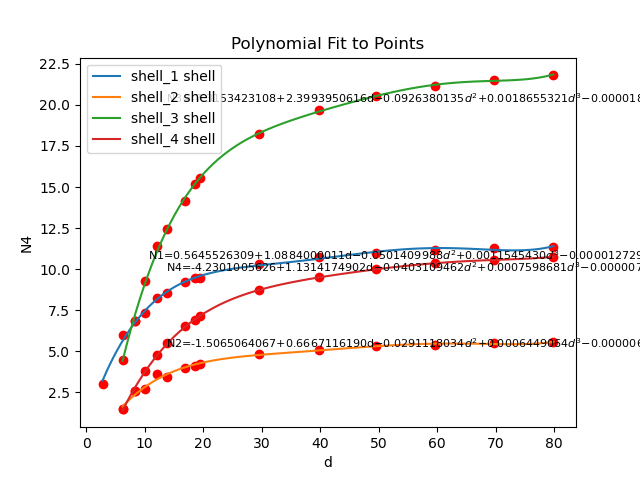

In [17]:
from neighbor_core import fit_polynomial
import matplotlib.pyplot as plt

degree = 5

plt.figure()
for i in range(1, 5):
    shell = f'shell_{i}'
    polynomial = fit_polynomial(np.array(sizes_all[shell]), 
                                np.array(CNs_all[shell]), 
                                degree=degree, new_figure=False, xlabel="d", ylabel=f"N{i}", )

legend_labels = sum([[ '_nolegend', f'{shell} shell'] for shell in CNs_all.keys()], [])
plt.legend(legend_labels)

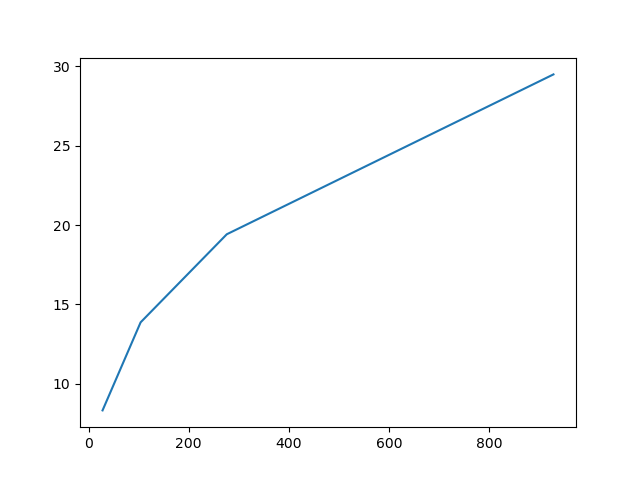

In [6]:
plt.figure()
plt.plot(num_atoms_all[shell], sizes_all[shell])
# for i in range(1, 5):
    # shell = f'shell_{i}'
    # plt.plot(num_atoms_all[shell], sizes_all[shell])

# Example 3: Shrinking Pt xyz file

In [17]:
fc = FileChooser()
display(fc)

FileChooser(path='/Users/juanjuanhuang/Desktop/neighbor', filename='', title='', show_hidden=False, select_des…

In [18]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="test_Pt/Pt_foil_2d_xyz.xyz")
   
cif_cluster.view_xyz(label=False, show_symbol=False)
cif_cluster.get_cluster_size()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

166.49181084505508

In [19]:
center_atom = "Pt"
CN_atom = "Pt"
CN_bond_range = 6
tolerance = 0.1

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

sizes = np.arange(5, 120, 10)/2 # radius

for size_i in sizes[::-1]:
    cif_cluster.shrink_cluster_size(new_radius=size_i, self_apply=True)
    
    num_atoms = len(cif_cluster.atoms)
    cif_cluster.atoms.set_pbc(False)    
    cif_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(cif_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    cif_cluster.write_to_excel(f"size_{cif_cluster.get_cluster_size():.2f}A")
    # cif_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(cif_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(cif_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)
    
    print(f"Processed size: {cif_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    # print(cif_cluster.CN_summary[f'{center_atom}-{CN_atom}'])
    cif_cluster.view_xyz(label=False)


Processed size: 114.84879197649056 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 104.75645310401072 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 94.88858132344482 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 84.9615529333498 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 74.95186655943934 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 64.82124140487284 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 54.78394797011256 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 44.90261857078717 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 33.975562231109585 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 23.86365064836476 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 14.145154541849308 A with 4 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 3.92316 A with 2 shells


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### polynomial fit

  Coefficient         Value
0    Constant  1.974417e+00
1         x^1  6.224028e-01
2         x^2 -2.198194e-02
3         x^3  3.653363e-04
4         x^4 -2.838567e-06
5         x^5  8.310774e-09
--------------------
N0=1.974417269997866+0.622402772341716*d-0.021981942013173*d^2+0.000365336285635*d^3-0.000002838566802*d^4+0.000000008310774*d^5


  Coefficient         Value
0    Constant -3.245169e-01
1         x^1  4.022543e-01
2         x^2 -1.378039e-02
3         x^3  2.244866e-04
4         x^4 -1.719982e-06
5         x^5  4.984059e-09
--------------------
N1=-0.324516919115215+0.402254301513789*d-0.013780387487665*d^2+0.000224486649734*d^3-0.000001719981860*d^4+0.000000004984059*d^5


  Coefficient         Value
0    Constant  3.326463e+00
1         x^1  5.578318e-01
2         x^2 -1.500207e-02
3         x^3  2.071547e-04
4         x^4 -1.411146e-06
5         x^5  3.750379e-09
--------------------
N2=3.326462885698540+0.557831802201305*d-0.015002072624636*d^2+0.000207154718761*d^3-0

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_31700/3210426337.py:13: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x302819000> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels);
/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_31700/3210426337.py:13: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x302840c70> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels);
/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_31700/3210426337.py:13: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x173262140> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels);
/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_31700/3210426337.py:13: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x301edacb0> starts with '_'. It

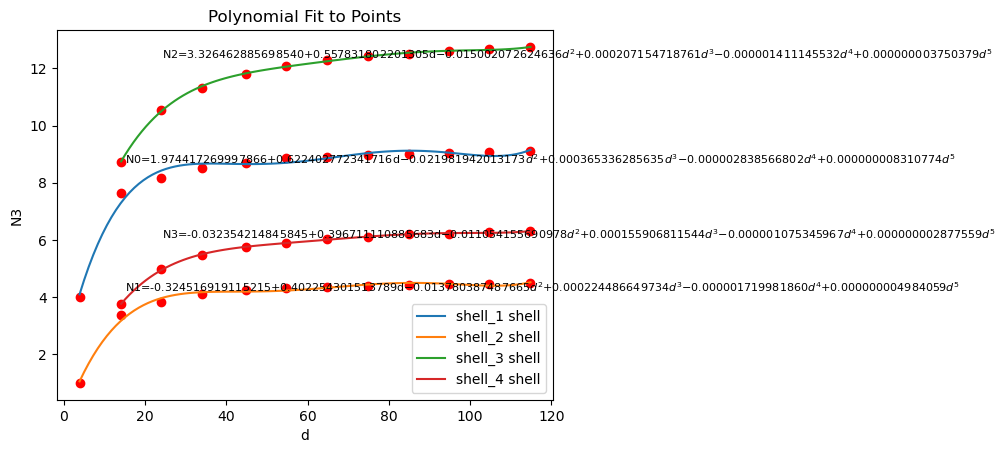

In [21]:
from neighbor_core import fit_polynomial
import matplotlib.pyplot as plt

degree = 5

plt.figure()
for i, shell_i in enumerate(sizes_all.keys()):
    polynomial = fit_polynomial(np.array(sizes_all[shell_i]), 
                                np.array(CNs_all[shell_i]), 
                                degree=degree, new_figure=False, xlabel="d", ylabel=f"N{i}", )

legend_labels = sum([[ '_nolegend', f'{shell_i} shell'] for shell_i in CNs_all.keys()], [])
plt.legend(legend_labels);

# Example 4: Polynomial fits of 2D oxide expanding

## Select a file

## View the CIF file

In [116]:
cif_cluster = ClusterNeighbor()
if fc.value is not None:
    cif_cluster.load_xyz(path=fc.value)
else:
   cif_cluster.load_xyz(path="structure_examples/PtO2.cif")
   
cif_cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### expand it

In [117]:
replication_factor =[10, 10, -0.5]

expanded = ClusterNeighbor()
expanded.load_xyz(from_file=False, atom_object=cif_cluster.expand_cif(replication_factors=[10, 10, 1], self_apply=False))
expanded.view_xyz(label=False, show_symbol=False)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

O-O
1 length: 2.604  CN: 9.000
2 length: 3.019  CN: 6.000
3 length: 3.131  CN: 18.000
4 length: 4.073  CN: 6.000
5 length: 4.292  CN: 1.000
6 length: 4.350  CN: 6.000
7 length: 4.657  CN: 3.000
O-Pt
1 length: 2.036  CN: 9.000
2 length: 3.355  CN: 1.000
3 length: 3.735  CN: 9.000
4 length: 3.811  CN: 3.000
5 length: 4.589  CN: 6.000
6 length: 4.874  CN: 18.000
7 length: 4.932  CN: 3.000
Pt-O
1 length: 2.036  CN: 18.000
2 length: 3.355  CN: 2.000
3 length: 3.735  CN: 18.000
4 length: 3.811  CN: 6.000
5 length: 4.589  CN: 12.000
6 length: 4.874  CN: 36.000
7 length: 4.932  CN: 6.000
Pt-Pt
1 length: 3.131  CN: 18.000
2 length: 4.657  CN: 6.000
Coordination numbers around 2.036 Å for Pt-O
200 atoms have CN of 18
Coordination numbers around 3.355 Å for Pt-O
200 atoms have CN of 2
Coordination numbers around 3.735 Å for Pt-O
200 atoms have CN of 12
Coordination numbers around 3.811 Å for Pt-O
200 atoms have CN of 6
Coordination numbers around 4.589 Å for Pt-O
200 atoms have CN of 12
Coordinat

defaultdict(<function neighbor_core.ClusterNeighbor._init_parameters.<locals>.<lambda>()>,
            {'Pt-O': defaultdict(dict,
                         {2.0363705294016157: {'average_CN': 18.0,
                           'info': '200 atoms have CN of 18; ',
                           'tolerance': 0.05},
                          3.354728578154095: {'average_CN': 2.0,
                           'info': '200 atoms have CN of 2; ',
                           'tolerance': 0.05},
                          3.7353169154215995: {'average_CN': 12.0,
                           'info': '200 atoms have CN of 12; ',
                           'tolerance': 0.05},
                          3.81058005893407: {'average_CN': 6.0,
                           'info': '200 atoms have CN of 6; ',
                           'tolerance': 0.05},
                          4.589116620266752: {'average_CN': 12.0,
                           'info': '200 atoms have CN of 12; ',
                           'toleran

### shift the cell and expand again

In [119]:
shifted_positions = cif_cluster.atoms.get_scaled_positions() - 0.3
cif_cluster.atoms.set_scaled_positions(shifted_positions)
cif_cluster.view_xyz(label=True, show_symbol=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [122]:
replication_factor =[10, 10, 1]

expanded = ClusterNeighbor()
expanded.load_xyz(from_file=False, atom_object=cif_cluster.expand_cif(replication_factors=[10, 10, 1], self_apply=False))
expanded.view_xyz(label=False, show_symbol=False)

expanded.get_CN_summary_all(tolerance=0.05, bond_range=5, printit=True)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

O-O
1 length: 2.604  CN: 9.000
2 length: 3.019  CN: 6.000
3 length: 3.131  CN: 18.000
4 length: 4.073  CN: 6.000
5 length: 4.292  CN: 1.000
6 length: 4.350  CN: 6.000
7 length: 4.657  CN: 3.000
O-Pt
1 length: 2.036  CN: 9.000
2 length: 3.355  CN: 1.000
3 length: 3.735  CN: 9.000
4 length: 3.811  CN: 3.000
5 length: 4.589  CN: 6.000
6 length: 4.874  CN: 18.000
7 length: 4.932  CN: 3.000
Pt-O
1 length: 2.036  CN: 18.000
2 length: 3.355  CN: 2.000
3 length: 3.735  CN: 18.000
4 length: 3.811  CN: 6.000
5 length: 4.589  CN: 12.000
6 length: 4.874  CN: 36.000
7 length: 4.932  CN: 6.000
Pt-Pt
1 length: 3.131  CN: 18.000
2 length: 4.657  CN: 6.000
Coordination numbers around 2.036 Å for Pt-O
200 atoms have CN of 18
Coordination numbers around 3.355 Å for Pt-O
200 atoms have CN of 2
Coordination numbers around 3.735 Å for Pt-O
200 atoms have CN of 12
Coordination numbers around 3.811 Å for Pt-O
200 atoms have CN of 6
Coordination numbers around 4.589 Å for Pt-O
200 atoms have CN of 12
Coordinat

defaultdict(<function neighbor_core.ClusterNeighbor._init_parameters.<locals>.<lambda>()>,
            {'Pt-O': defaultdict(dict,
                         {2.0363705294016157: {'average_CN': 18.0,
                           'info': '200 atoms have CN of 18; ',
                           'tolerance': 0.05},
                          3.3547285781540945: {'average_CN': 2.0,
                           'info': '200 atoms have CN of 2; ',
                           'tolerance': 0.05},
                          3.7353169154216: {'average_CN': 12.0,
                           'info': '200 atoms have CN of 12; ',
                           'tolerance': 0.05},
                          3.81058005893407: {'average_CN': 6.0,
                           'info': '200 atoms have CN of 6; ',
                           'tolerance': 0.05},
                          4.5891166202667515: {'average_CN': 12.0,
                           'info': '200 atoms have CN of 12; ',
                           'toleranc

### Calculation loops

In [129]:
center_atom = "Pt"
CN_atom = "O"
CN_bond_range = 4
tolerance = 0.1
undercoordinated_threshold = 6

# Initialize dictionaries to store results
CNs_all = {}
bondlengths_all = {}
num_atoms_all = {}
sizes_all = {}

replication_list = [[i, i, 1] for i in range(2, 11)]  # Generates rows [1,1,1] to [10,10,1]

for replication_factor_i in replication_list:
    expanded_cluster = cif_cluster.expand_cif(replication_factors=replication_factor_i, self_apply=False)
    new_cluster = ClusterNeighbor()
    new_cluster.load_xyz(from_file=False, atom_object=expanded_cluster)
    new_cluster.view_xyz(label=False)

    num_atoms = len(new_cluster.atoms)
    new_cluster.atoms.set_pbc(False)
    new_cluster.get_CN_summary_all(tolerance=tolerance, 
                                   bond_range=CN_bond_range, 
                                   printit=False)
    
    # Get bond lengths for each shell
    bond_lengths = list(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'].keys())
    new_cluster.write_to_excel(f"size_{new_cluster.get_cluster_size():.2f}A")
    # new_cluster.print_CN_summary()
    for shell_index, bond_length in enumerate(bond_lengths):
        shell_key = f'shell_{shell_index + 1}'
        
        # Ensure the key exists in each dictionary
        if shell_key not in CNs_all:
            CNs_all[shell_key] = []
            bondlengths_all[shell_key] = []
            num_atoms_all[shell_key] = []
            sizes_all[shell_key] = []
        
        # Append data to the relevant shell
        bondlengths_all[shell_key].append(bond_length)
        CNs_all[shell_key].append(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'][bond_length]['average_CN'])
        sizes_all[shell_key].append(new_cluster.get_cluster_size())
        num_atoms_all[shell_key].append(num_atoms)

    print(f"Processed size: {new_cluster.get_cluster_size()} A with {len(bond_lengths)} shells")
    print(new_cluster.CN_summary[f'{center_atom}-{CN_atom}'])


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 8.972769877714956 A with 3 shells
defaultdict(<class 'dict'>, {2.0363653204056775: {'average_CN': 3.75, 'info': '2 atoms have CN of 2; \n2 atoms have CN of 3; \n4 atoms have CN of 5; ', 'tolerance': 0.1}, 3.354728578154094: {'average_CN': 0.5, 'info': '4 atoms have CN of 0; \n4 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7604086904879974: {'average_CN': 2.625, 'info': '1 atoms have CN of 1; \n4 atoms have CN of 2; \n1 atoms have CN of 3; \n1 atoms have CN of 4; \n1 atoms have CN of 5; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 13.363374277687774 A with 3 shells
defaultdict(<class 'dict'>, {2.0363666222533845: {'average_CN': 4.444444444444445, 'info': '2 atoms have CN of 2; \n4 atoms have CN of 3; \n8 atoms have CN of 5; \n4 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154094: {'average_CN': 0.5, 'info': '9 atoms have CN of 0; \n9 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7554601586055743: {'average_CN': 3.9444444444444446, 'info': '1 atoms have CN of 1; \n4 atoms have CN of 2; \n4 atoms have CN of 3; \n2 atoms have CN of 4; \n4 atoms have CN of 5; \n1 atoms have CN of 6; \n2 atoms have CN of 8; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 18.58166192906721 A with 3 shells
defaultdict(<class 'dict'>, {2.0363674847662985: {'average_CN': 4.8125, 'info': '2 atoms have CN of 2; \n6 atoms have CN of 3; \n12 atoms have CN of 5; \n12 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154094: {'average_CN': 0.5, 'info': '16 atoms have CN of 0; \n16 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7537605718242815: {'average_CN': 4.71875, 'info': '1 atoms have CN of 1; \n4 atoms have CN of 2; \n7 atoms have CN of 3; \n3 atoms have CN of 4; \n7 atoms have CN of 5; \n4 atoms have CN of 6; \n4 atoms have CN of 8; \n2 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 23.891656977586813 A with 3 shells
defaultdict(<class 'dict'>, {2.03636804854519: {'average_CN': 5.04, 'info': '2 atoms have CN of 2; \n8 atoms have CN of 3; \n16 atoms have CN of 5; \n24 atoms have CN of 6; ', 'tolerance': 0.1}, 3.3547285781540936: {'average_CN': 0.5, 'info': '25 atoms have CN of 0; \n25 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7529084588262838: {'average_CN': 5.22, 'info': '1 atoms have CN of 1; \n4 atoms have CN of 2; \n10 atoms have CN of 3; \n4 atoms have CN of 4; \n10 atoms have CN of 5; \n9 atoms have CN of 6; \n6 atoms have CN of 8; \n6 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 29.24344561352421 A with 3 shells
defaultdict(<class 'dict'>, {2.0363684398887822: {'average_CN': 5.194444444444445, 'info': '2 atoms have CN of 2; \n10 atoms have CN of 3; \n20 atoms have CN of 5; \n40 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154094: {'average_CN': 0.5, 'info': '36 atoms have CN of 0; \n36 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7523976446024343: {'average_CN': 5.569444444444445, 'info': '1 atoms have CN of 1; \n4 atoms have CN of 2; \n13 atoms have CN of 3; \n5 atoms have CN of 4; \n13 atoms have CN of 5; \n16 atoms have CN of 6; \n8 atoms have CN of 8; \n12 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 34.61764975696029 A with 3 shells
defaultdict(<class 'dict'>, {2.0363687259789622: {'average_CN': 5.3061224489795915, 'info': '2 atoms have CN of 2; \n12 atoms have CN of 3; \n24 atoms have CN of 5; \n60 atoms have CN of 6; ', 'tolerance': 0.1}, 3.3547285781540945: {'average_CN': 0.5, 'info': '49 atoms have CN of 0; \n49 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7520575998970496: {'average_CN': 5.826530612244898, 'info': '1 atoms have CN of 1; \n4 atoms have CN of 2; \n16 atoms have CN of 3; \n6 atoms have CN of 4; \n16 atoms have CN of 5; \n25 atoms have CN of 6; \n10 atoms have CN of 8; \n20 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 40.00523669681189 A with 3 shells
defaultdict(<class 'dict'>, {2.0363689437758765: {'average_CN': 5.390625, 'info': '2 atoms have CN of 2; \n14 atoms have CN of 3; \n28 atoms have CN of 5; \n84 atoms have CN of 6; ', 'tolerance': 0.1}, 3.3547285781540945: {'average_CN': 0.5, 'info': '64 atoms have CN of 0; \n64 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7518150582627463: {'average_CN': 6.0234375, 'info': '1 atoms have CN of 1; \n4 atoms have CN of 2; \n19 atoms have CN of 3; \n7 atoms have CN of 4; \n19 atoms have CN of 5; \n36 atoms have CN of 6; \n12 atoms have CN of 8; \n30 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 45.40144245250657 A with 3 shells
defaultdict(<class 'dict'>, {2.036369114940371: {'average_CN': 5.45679012345679, 'info': '2 atoms have CN of 2; \n16 atoms have CN of 3; \n32 atoms have CN of 5; \n112 atoms have CN of 6; ', 'tolerance': 0.1}, 3.354728578154094: {'average_CN': 0.5, 'info': '81 atoms have CN of 0; \n81 atoms have CN of 1; ', 'tolerance': 0.1}, 3.7516333832404216: {'average_CN': 6.179012345679013, 'info': '1 atoms have CN of 1; \n4 atoms have CN of 2; \n22 atoms have CN of 3; \n8 atoms have CN of 4; \n22 atoms have CN of 5; \n49 atoms have CN of 6; \n14 atoms have CN of 8; \n42 atoms have CN of 9; ', 'tolerance': 0.1}})


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Processed size: 50.80352069981504 A with 3 shells
defaultdict(<class 'dict'>, {2.0363692529172956: {'average_CN': 5.51, 'info': '2 atoms have CN of 2; \n18 atoms have CN of 3; \n36 atoms have CN of 5; \n144 atoms have CN of 6; ', 'tolerance': 0.1}, 3.3547285781540945: {'average_CN': 0.5, 'info': '100 atoms have CN of 0; \n100 atoms have CN of 1; ', 'tolerance': 0.1}, 3.751492236043195: {'average_CN': 6.305, 'info': '1 atoms have CN of 1; \n4 atoms have CN of 2; \n25 atoms have CN of 3; \n9 atoms have CN of 4; \n25 atoms have CN of 5; \n64 atoms have CN of 6; \n16 atoms have CN of 8; \n56 atoms have CN of 9; ', 'tolerance': 0.1}})


### polynomial fit

  Coefficient         Value
0    Constant  1.238275e-01
1         x^1  6.700024e-01
2         x^2 -3.869635e-02
3         x^3  1.162756e-03
4         x^4 -1.735078e-05
5         x^5  1.014770e-07
--------------------
N30.0=0.123827516732729+0.670002380971239*d-0.038696349784712*d^2+0.001162755947837*d^3-0.000017350781177*d^4+0.000000101476968*d^5


  Coefficient         Value
0    Constant  5.000000e-01
1         x^1  2.828308e-16
2         x^2 -1.726871e-17
3         x^3  4.955004e-19
4         x^4 -6.915867e-21
5         x^5  3.739673e-23
--------------------
N30.0=0.499999999999999+0.000000000000000*d-0.000000000000000*d^2+0.000000000000000*d^3-0.000000000000000*d^4+0.000000000000000*d^5


  Coefficient         Value
0    Constant -3.820091e+00
1         x^1  1.164276e+00
2         x^2 -6.457787e-02
3         x^3  1.904906e-03
4         x^4 -2.815198e-05
5         x^5  1.637306e-07
--------------------
N30.0=-3.820091265496041+1.164276260963191*d-0.064577873552563*d^2+0.001904906205

/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_2965/1393716361.py:13: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x12b77d900> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels);
/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_2965/1393716361.py:13: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x12d53e710> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels);
/var/folders/w1/ylvphmjx1qgb2dvsd7gt36b00000gn/T/ipykernel_2965/1393716361.py:13: UserWarning: The label '_nolegend' of <matplotlib.collections.PathCollection object at 0x12d2b65f0> starts with '_'. It is thus excluded from the legend.
  plt.legend(legend_labels);


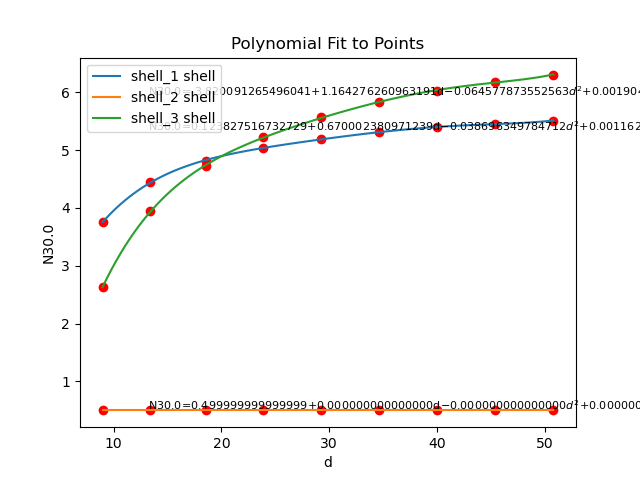

In [131]:
from neighbor_core import fit_polynomial
import matplotlib.pyplot as plt

degree = 5

plt.figure()
for shell_i in sizes_all.keys():
    polynomial = fit_polynomial(np.array(sizes_all[shell_i]), 
                                np.array(CNs_all[shell_i]), 
                                degree=degree, new_figure=False, xlabel="d", ylabel=f"N{i}", )

legend_labels = sum([[ '_nolegend', f'{shell_i} shell'] for shell_i in CNs_all.keys()], [])
plt.legend(legend_labels);

# ASE cluster magic numbers

In [1]:
from ase.cluster import Cluster
from ase.cluster import Icosahedron

# Create a simple cluster with 13 atoms
atoms = Icosahedron('Cu', noshells=3)

view = ClusterNeighbor()
view.load_xyz(from_file=False, atom_object=atoms)
view.view_xyz(label=True, show_symbol=True)


NameError: name 'ClusterNeighbor' is not defined

# make a example of flat Pt, shrinking it smaller

# Wulff construction examples

In [14]:
from ase.cluster.wulff import wulff_construction
import py3Dmol

# Create a Wulff construction for Cu with specific Miller indices and surface energies
atoms = wulff_construction('Cu', surfaces=[(1, 0, 0), 
                                           (1, 1, 1), 
                                           (1, 1, 0)], 
                           energies=[1.0, 1.0, 1.0], 
                           size=60, 
                           structure='fcc')


view = ClusterNeighbor()
view.load_xyz(from_file=False, atom_object=atoms)
view.view_xyz(label=True, show_symbol=True)


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol